# Crypto API Project

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start': '1',
    'limit': '5000',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'de235869-74d6-4684-8c29-d2c914d0b9e6',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [3]:
import pandas as pd

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/nikhilkuniyil/Documents/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9684,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.912908e+07,1.912908e+07,NaN,1,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,2.141313e+04,3.163767e+10,36.3125,0.933757,-0.275282,-10.863074,-5.108862,1.778327,-27.661235,4.096134e+11,39.9868,4.496758e+11,NaN,2022-08-23T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 00:40:40.924744
1,1027,Ethereum,ETH,ethereum,6021,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.220724e+08,1.220724e+08,NaN,2,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,1.621140e+03,1.842559e+10,15.5074,1.825812,0.528820,-14.056277,3.776356,41.373007,-17.979515,1.978965e+11,19.3216,1.978965e+11,NaN,2022-08-23T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 00:40:40.924744
2,825,Tether,USDT,tether,38617,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754956e+10,6.915778e+10,NaN,3,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,9.999519e-01,5.170428e+10,13.1408,-0.000784,-0.005547,-0.024708,-0.005777,0.067755,0.093081,6.754631e+10,6.5963,6.915445e+10,NaN,2022-08-23T00:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-23 00:40:40.924744
3,3408,USD Coin,USDC,usd-coin,5906,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.226474e+10,5.226474e+10,NaN,4,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,1.000183e+00,5.446318e+09,0.0000,0.013588,0.012048,0.032196,0.034620,0.002978,-0.014471,5.227431e+10,5.1031,5.227431e+10,NaN,2022-08-23T00:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-23 00:40:40.924744
4,1839,BNB,BNB,bnb,1074,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,3.004572e+02,1.442101e+09,13.3325,0.252380,-0.829996,-5.607883,15.504817,30.999927,-8.633053,4.847495e+10,4.7336,6.009144e+10,NaN,2022-08-23T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 00:40:40.924744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16528,Sivasspor Token,SIV,sivasspor-token,1,2021-12-28T03:13:45.000Z,[],1.000000e+06,0.000000e+00,5.995290e+05,NaN,4996,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,5.801189e-01,1.078884e+04,-2.3638,0.962464,-3.443725,-39.418099,-85.233602,-85.675000,-78.361632,0.000000e+00,0.0000,5.801189e+05,NaN,2022-08-23T00:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6cf9464B2C628Db187f2Bc1DDc0C43fDA72EfDd5,2022-08-23 00:40:40.924744
4996,5698,GM Holding,GM,gm-holding,3,2020-06-19T00:00:00.000Z,[bnb-chain],1.000000e+08,0.000000e+00,9.999900e+07,NaN,4997,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,2.999856e-04,1.073712e+04,269532.4655,-0.000784,-0.005547,-25.018531,225.239606,138.331282,-48.996140,0.000000e+00,0.0000,2.999856e+04,NaN,2022-08-23T00:28:00.000Z,1839.0,BNB,BNB,bnb,0xd523f5097fe10cb8760f7011796a6edf7a268061,2022-08-23 00:40:40.924744
4997,21050,Neuron Chain,NEURON,neuron-chain,1,2022-07-19T17:00:38.000Z,[],1.000000e+12,0.000000e+00,1.000000e+12,NaN,4998,6.400000e+11,42055.964715,NaN,2022-08-23T00:28:00.000Z,6.571244e-08,1.069554e+04,44.3056,44.294196,-22.391053,87.052095,1847.095715,1847.095715,1847.095715,0.000000e+00,0.0000,6.571244e+04,NaN,2022-08-23T00:28:00.000Z,18

In [33]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/nikhilkuniyil/Desktop/PythonScripts/API.csv'):
        df.to_csv(r'/Users/nikhilkuniyil/Desktop/PythonScripts/API.csv',header='column_names')
    else:
        df.to_csv(r'/Users/nikhilkuniyil/Desktop/PythonScripts/API.csv',mode='a',header=False)


In [34]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

/Users/nikhilkuniyil/Documents/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


/Users/nikhilkuniyil/Documents/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [40]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [41]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9684,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19129075.00000,19129075.00000,NaN,1,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,21413.13296,31637668835.80740,36.31250,0.93376,-0.27528,-10.86307,-5.10886,1.77833,-27.66124,409613426316.90106,39.98680,449675792094.22998,NaN,2022-08-23T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 01:02:56.044155,2022-08-23 01:24:01.372517
1,1027,Ethereum,ETH,ethereum,6021,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,122072405.62400,122072405.62400,NaN,2,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,1621.14038,18425587647.01134,15.50740,1.82581,0.52882,-14.05628,3.77636,41.37301,-17.97952,197896506049.25040,19.32160,197896506049.25000,NaN,2022-08-23T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 01:02:56.044155,2022-08-23 01:24:01.372517
2,825,Tether,USDT,tether,38617,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67549555015.74651,69157777033.00569,NaN,3,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,0.99995,51704282119.53892,13.14080,-0.00078,-0.00555,-0.02471,-0.00578,0.06776,0.09308,67546308447.54685,6.59630,69154453170.39999,NaN,2022-08-23T00:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-23 01:02:56.044155,2022-08-23 01:24:01.372517
3,3408,USD Coin,USDC,usd-coin,5906,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52264744495.97619,52264744495.97619,NaN,4,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,1.00018,5446317940.49267,0.00000,0.01359,0.01205,0.03220,0.03462,0.00298,-0.01447,52274313687.76621,5.10310,52274313687.77000,NaN,2022-08-23T00:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-23 01:02:56.044155,2022-08-23 01:24:01.372517
4,1839,BNB,BNB,bnb,1074,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-23T00:28:00.000Z,300.45722,1442101221.35824,13.33250,0.25238,-0.83000,-5.60788,15.50482,30.99993,-8.63305,48474945600.94130,4.73360,60091444807.53000,NaN,2022-08-23T00:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 01:02:56.044155,2022-08-23 01:24:01.372517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,397,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1109859712.89782,1225083383.22300,NaN,11,904869778.00000,6693712119.76148,None,2022-08-23T01:07:00.000Z,7.39743,325262715.14829,25.85280,-0.01149,0.13346,-16.62478,0.50859,-4.44223,-26.66558,8210111103.36714,0.80270,9062470301.66000,None,2022-08-23T01:07:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2022-08-23 01:24:01.372517
11,5994,Shiba Inu,SHIB,shiba-inu,403,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,549063278876301.93750,589735030408322.75000,NaN,12,NaN,NaN,None,2022-08-23T01:07:00.000Z,0.00001,450218728.81031,5.18050,-0.01403,-2.04269,-15.27067,12.81293,28.50284,12.58000,7224690658.95300,0.70630,7759858160.92000,None,2022-08-23T01:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,NaT,2022-08-23 01:24:01.372517
12,4943,Dai,DAI,multi-collateral-

In [43]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
                              'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04861,-0.55491,-11.51388,-5.39593,1.63024,-27.91750
Ethereum,0.44410,0.67744,-14.52292,3.67483,41.84116,-17.85942
Tether,-0.00006,-0.00616,-0.02247,-0.00775,0.06779,0.08815
USD Coin,-0.00239,-0.00492,-0.00211,0.00942,-0.01768,-0.00347
BNB,-0.90541,-1.35519,-7.29097,14.39590,29.89328,-9.69451
...,...,...,...,...,...,...
Affinity,-4.19710,-5.79711,-20.56119,10.19034,28.15867,-20.10310
Ocavu Network Token,-0.28604,-0.54555,0.06639,-13.97956,-61.16241,-89.49836
Memecoin,-0.22743,-6.76585,-24.45651,-5.63101,-11.01991,-22.56750


In [44]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.04861
         quote.USD.percent_change_24h    -0.55491
         quote.USD.percent_change_7d    -11.51388
         quote.USD.percent_change_30d    -5.39593
         quote.USD.percent_change_60d     1.63024
                                           ...   
DOEX     quote.USD.percent_change_24h     6.48500
         quote.USD.percent_change_7d    -16.92930
         quote.USD.percent_change_30d   -16.51980
         quote.USD.percent_change_60d   -42.06131
         quote.USD.percent_change_90d   -66.94123
Length: 29958, dtype: float64

In [45]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.04861
        quote.USD.percent_change_24h  -0.55491
        quote.USD.percent_change_7d  -11.51388
        quote.USD.percent_change_30d  -5.39593
        quote.USD.percent_change_60d   1.63024
...                                        ...
DOEX    quote.USD.percent_change_24h   6.48500
        quote.USD.percent_change_7d  -16.92930
        quote.USD.percent_change_30d -16.51980
        quote.USD.percent_change_60d -42.06131
        quote.USD.percent_change_90d -66.94123

[29958 rows x 1 columns]

In [50]:
df6 = df5.head(90)
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.04861
            quote.USD.percent_change_24h  -0.55491
            quote.USD.percent_change_7d  -11.51388
            quote.USD.percent_change_30d  -5.39593
            quote.USD.percent_change_60d   1.63024
            quote.USD.percent_change_90d -27.91750
Ethereum    quote.USD.percent_change_1h    0.44410
            quote.USD.percent_change_24h   0.67744
            quote.USD.percent_change_7d  -14.52292
            quote.USD.percent_change_30d   3.67483
            quote.USD.percent_change_60d  41.84116
            quote.USD.percent_change_90d -17.85942
Tether      quote.USD.percent_change_1h   -0.00006
            quote.USD.percent_change_24h  -0.00616
            quote.USD.percent_change_7d   -0.02247
            quote.USD.percent_change_30d  -0.00775
            quote.USD.percent_change_60d   0.06779
            quote.USD.percent_change_90d   0.08815
USD Coin    quote.USD.percent_change_1h   -0.00239
            quote.USD.percent_change_24h  -0.00492
            quote.USD.percent_change_7d   -0.00211
            quote.USD.percent_change_30d   0.00942
            quote.USD.percent_change_60d  -0.01768
            quote.USD.percent_change_90d  -0.00347
BNB         quote.USD.percent_change_1h   -0.90541
            quote.USD.percent_change_24h  -1.35519
            quote.USD.percent_change_7d   -7.29097
            quote.USD.percent_change_30d  14.39590
            quote.USD.percent_change_60d  29.89328
            quote.USD.percent_change_90d  -9.69451
Binance USD quote.USD.percent_change_1h    0.01972
            quote.USD.percent_change_24h   0.04264
            quote.USD.percent_change_7d    0.04082
            quote.USD.percent_change_30d   0.09351
            quote.USD.percent_change_60d   0.00122
            quote.USD.percent_change_90d   0.05963
XRP         quote.USD.percent_change_1h   -0.16525
            quote.USD.percent_change_24h  -0.03155
            quote.USD.percent_change_7d   -8.59384
            quote.USD.percent_change_30d  -4.81053
            quote.USD.percent_change_60d  -0.03296
            quote.USD.percent_change_90d -15.91142
Cardano     quote.USD.percent_change_1h    0.16369
            quote.USD.percent_change_24h  -0.08997
            quote.USD.percent_change_7d  -16.94673
            quote.USD.percent_change_30d -11.03905
            quote.USD.percent_change_60d  -3.59407
            quote.USD.percent_change_90d -11.26988
Solana      quote.USD.percent_change_1h   -0.04563
            quote.USD.percent_change_24h  -2.73545
            quote.USD.percent_change_7d  -19.23121
            quote.USD.percent_change_30d -11.90301
            quote.USD.percent_change_60d  -7.19877
            quote.USD.percent_change_90d -28.36513
Dogecoin    quote.USD.percent_change_1h    0.35517
            quote.USD.percent_change_24h  -0.91028
            quote.USD.percent_change_7d  -13.01896
            quote.USD.percent_change_30d   0.57039
            quote.USD.percent_change_60d   6.68284
            quote.USD.percent_change_90d -17.65644
Polkadot    quote.USD.percent_change_1h    0.10770
            quote.USD.percent_change_24h  -0.02055
            quote.USD.percent_change_7d  -16.33662
            quote.USD.percent_change_30d   0.45392
            quote.USD.percent_change_60d  -4.77480
            quote.USD.percent_change_90d -26.88674
Shiba Inu   quote.USD.percent_change_1h    0.15474
            quote.USD.percent_change_24h  -2.01644
            quote.USD.percent_change_7d  -14.83827
            quote.USD.percent_change_30d  12.78327
            quote.USD.percent_change_60d  28.28670
            quote.USD.percent_change_90d  12.50450
Dai         quote.USD.percent_change_1h   -0.00151
            quote.USD.percent_change_24h   0.04903
            quote.USD.percent_change_7d    0.04131
            quote.USD.percent_change_30d   0.03060
            quote.USD.percent_change_60d  -0.01929
            quo

In [58]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04861
1,Bitcoin,quote.USD.percent_change_24h,-0.55491
2,Bitcoin,quote.USD.percent_change_7d,-11.51388
3,Bitcoin,quote.USD.percent_change_30d,-5.39593
4,Bitcoin,quote.USD.percent_change_60d,1.63024
5,Bitcoin,quote.USD.percent_change_90d,-27.91750
6,Ethereum,quote.USD.percent_change_1h,0.44410
7,Ethereum,quote.USD.percent_change_24h,0.67744
8,Ethereum,quote.USD.percent_change_7d,-14.52292
9,Ethereum,quote.USD.percent_change_30d,3.67483


In [60]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04861
1,Bitcoin,quote.USD.percent_change_24h,-0.55491
2,Bitcoin,quote.USD.percent_change_7d,-11.51388
3,Bitcoin,quote.USD.percent_change_30d,-5.39593
4,Bitcoin,quote.USD.percent_change_60d,1.63024
5,Bitcoin,quote.USD.percent_change_90d,-27.91750
6,Ethereum,quote.USD.percent_change_1h,0.44410
7,Ethereum,quote.USD.percent_change_24h,0.67744
8,Ethereum,quote.USD.percent_change_7d,-14.52292
9,Ethereum,quote.USD.percent_change_30d,3.67483


In [69]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
                              'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                      ['1h','24h','7d','30d','60d','90d'])

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

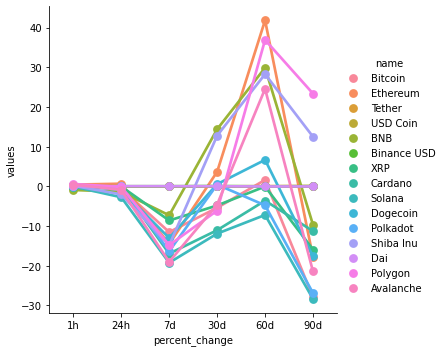

In [71]:
sns.catplot(x='percent_change',y='values',hue='name',data=df8,kind='point')

In [74]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,21413.13296,2022-08-23 01:02:56.044155
0,Bitcoin,21323.96384,2022-08-23 01:02:56.044155
0,Bitcoin,21325.96837,NaT
0,Bitcoin,21330.89060,NaT
0,Bitcoin,21338.73102,NaT
